In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df= pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.size

731997

In [5]:
df.shape

(34857, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [8]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df1 = df[cols_to_use]

In [9]:
df1.size

522855

In [10]:
df1.shape

(34857, 15)

In [11]:
df1.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

# Handling missing values 

In [12]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df1[cols_to_fill_zero] = df1[cols_to_fill_zero].fillna(0)

In [13]:
df1['Landsize'] = df1['Landsize'].fillna(df1.Landsize.mean())
df1['BuildingArea'] = df1['BuildingArea'].fillna(df1.BuildingArea.mean())

In [14]:
df1.isnull().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [15]:
df1.dropna(inplace=True)

In [16]:
df1.shape

(27244, 15)

In [17]:
df2 = pd.get_dummies(df1, drop_first = True)
df2.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
for cols in df2.columns[:-1]:
    Q1 = df2[cols].quantile(q=0.25)
    Q3 = df2[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low = Q1-1.5*(Q3-Q1)
    high = Q3+1.5*(Q3-Q1)
    df2.loc[(df2[cols]<low) | (df2[cols]>high),cols] = df2[cols].median()

<AxesSubplot:xlabel='Rooms'>

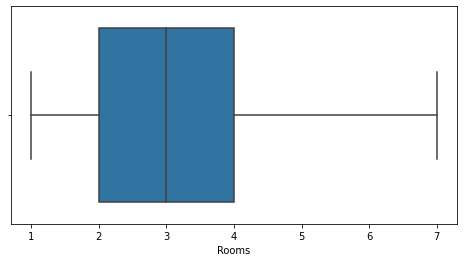

In [19]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Rooms', data=df2, orient='h')

# Non Data Standardization for Multiple Regression 

In [44]:
X = df2.drop('Price',axis=1)
y = df2['Price']
X.shape

(27244, 744)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [22]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression().fit(x_train,y_train)
mlr_predict = mlr.predict(x_test)

In [23]:
mlr.score(x_test, y_test)

0.3348690914347159

In [24]:
mlr.score(x_train,y_train)

0.3426181139054757

In [25]:
from sklearn import metrics 
print('R Score = ' , metrics.r2_score(y_test,mlr_predict))
print('MSE = ', metrics.mean_squared_error(y_test,mlr_predict))

R Score =  0.3348690914347159
MSE =  119305947929.20363


# Non Data Standardization for Linear Regression

In [30]:
df1.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0,160.2564,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0,142.0000,1600000.0


<AxesSubplot:>

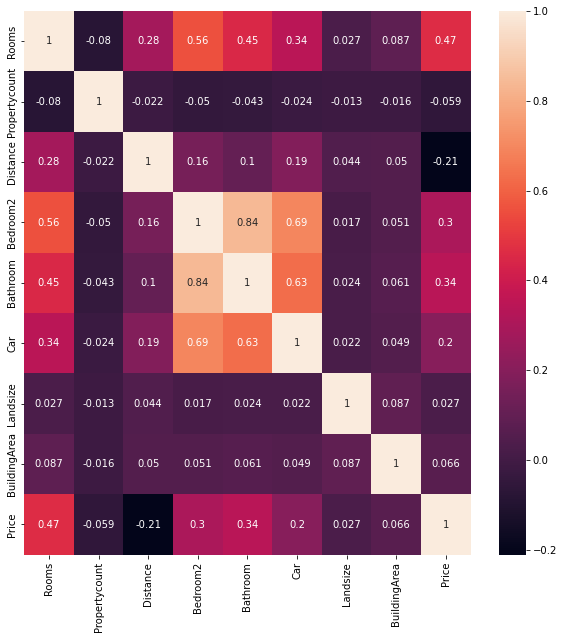

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(),annot=True)

### Heat Map clearly shows the relation between the price and room 

In [36]:
A = df1['Rooms'].values.reshape(-1,1)
b= df1['Price']

In [37]:

x_train, x_test, y_train, y_test = train_test_split(A, b, test_size = 0.3, random_state=2)

In [39]:
slr = LinearRegression().fit(x_train, y_train)
slr_predict=slr.predict(x_test)

In [40]:
slr.score(x_test, y_test)

0.2135676692860774

In [41]:
slr.score(x_train, y_train)

0.21750641037962182

In [42]:
print("R score",metrics.r2_score(y_test,slr_predict))
print("MSE = ", metrics.mean_squared_error(y_test,slr_predict))

R score 0.2135676692860774
MSE =  312464313219.3591


# Data Standardization for Multi-Linear Regression

In [43]:
C = df2.drop('Price',axis=1)
d= df2['Price']
C.shape

(27244, 744)

In [47]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(C)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(scaled,d,test_size=0.2,random_state=42)

In [49]:
mlr_scaled = LinearRegression().fit(x_train, y_train)
mlr_scaled_predict=mlr_scaled.predict(x_test)

In [51]:
mlr_scaled.score(x_test, y_test)

0.3291026008971749

In [52]:
mlr_scaled.score(x_train, y_train)

0.34313180548106514

In [53]:
print("R score",metrics.r2_score(y_test,mlr_scaled_predict))
print("MSE = ", metrics.mean_squared_error(y_test,mlr_scaled_predict))

R score 0.3291026008971749
MSE =  120680821675.216


# Data Standardization for Linear Regression

In [55]:
N = df1['Rooms'].values.reshape(-1,1)
k= df1['Price']

In [56]:
scaled = scaler.fit_transform(N)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [60]:
slr_scaled = LinearRegression().fit(x_train, y_train)
slr_scaled_predict=slr_scaled.predict(x_test)

In [61]:
slr_scaled.score(X_test, y_test)

0.16540642532606875

In [63]:
slr_scaled.score(X_train, y_train)

0.1717995278341593

In [64]:
print("R score",metrics.r2_score(y_test,slr_scaled_predict))
print("MSE = ", metrics.mean_squared_error(y_test,slr_scaled_predict))

R score 0.16540642532606875
MSE =  150126440333.7909


# Values for R Squared And Mean Squared Error are as follows 

##   Non Data Standardization for Multi-Linear Regression

#### R Score =  0.3348690914347159

#### MSE =  119305947929.20363

## Non Data Standardization for Linear Regression

#### R score 0.2135676692860774

#### MSE =  312464313219.3591

## Data Standardization for Multi-Linear Regression

#### R score 0.3291026008971749

#### MSE =  120680821675.216

## Data Standardization for Linear Regression

#### R score 0.16540642532606875

#### MSE =  150126440333.7909